## Lista 01 - Modelagem e Simulação de Processos

Professor : Príamo Albuquerque

Aluno : Matheus Cadorini

In [1]:
## Importando bibliotecas para realização do trabalho

# Bibliotecas para manipulação de vetores, matrizes e valores numéricos
import numpy as np
import pandas as pd

# Bibliotecas para resolução de equações algébricas e diferenciais    
from scipy.optimize import fsolve 
from scipy.integrate import odeint 

# Visualização gráfica
import matplotlib.pyplot as plt 

## Parâmetros do modelo CSTR

Q = 0.1           # m³/h
V = 0.1           # m³
K0 = 9700*3600    # 1/h 
deltaH = -5960.0  # kcal/gmol
EA = 11843.0      # kcal/kgmol
Cp = 500.0        # kcal/m³ K
hA = 15.0         # kcal/m³K  
R = 1.987         # kcal/kgmol K
Tc = 298.5        # K
Tf = 298.15       # K
Cf = 10.0         # kgmol/m³

## Modelo do reator CSTR

Modelo:

$V\frac{dC}{dt}=q(C_f-C)-Vk(T)C$

$VC_p\frac{dT}{dt}=qC_p(T_f-T)+(-\Delta H)Vk(T)C-(hA)(T-T_{cf})$

Onde
$k(T)=k_0 e^{-\frac{E}{RT}}$

## Lista 01 - Letra A 

Gráfico contendo a curva do calor gerado e calor retirado observando a existência dos três estados estacionários do reator.

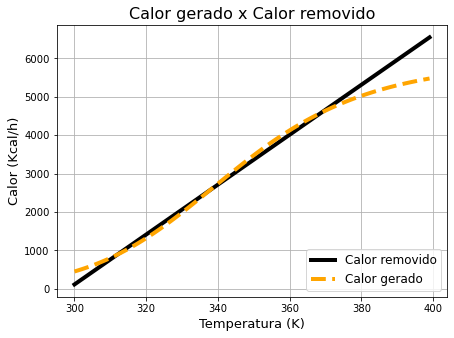

In [2]:
## Limites inferior e superior para o intervalo de temperatura (K)
T1 = 300.0
T2 = 400.0

## Criação dos vetores realização do gráfico
vetor_T = np.arange(T1,T2,1)

# Vetores vazios
Qr = []
Qg = []
Cee = []
    
## Loop para criação das curvas do calor gerado/removido    

for T in vetor_T:  
    
    # Cálculo da constante cinética
    exp = np.exp(-EA/(R*T))
    K = K0 * exp 
    K = np.float_(K)
    
    # Cálculo dos valores individuais das variáveis 
    C = Q * Cf / (Q + (V*K))                               # Cálculo da CEE  
    qr = ((Q * Cp) + hA)*T - ( (Q * Cp* Tf) +( hA * Tc) )  # Equação do calor removido
    qg = -(deltaH * V * Q * K * Cf) / (Q + (V * K))        # Equação do calor gerado
        
    # Vetores para armazenamento das variáveis
    Qr = np.append(Qr,qr)        
    Qg = np.append(Qg,qg)
    Cee = np.append(Cee,C)
                       
calor_gerado = Qg
calor_removido = Qr

fig = plt.figure(figsize = (7,5))
plt.plot(vetor_T,calor_removido,color = 'black',linewidth = 4, label = 'Calor removido')
plt.plot(vetor_T,calor_gerado,color ='orange', linewidth = 4, linestyle ='--',label = 'Calor gerado')
plt.xlabel('Temperatura (K)', fontsize = 13)
plt.ylabel('Calor (Kcal/h)', fontsize = 13)
plt.title('Calor gerado x Calor removido', fontsize = 16)
plt.legend(loc ='lower right', fontsize = 12)
plt.grid()
plt.show()

## Análise do gráfico

É possível observar pelo gráfico construído que as curvas do calor removido e calor gerado interceptam-se em 3 diferentes pontos para o conjunto de dados fornecido, caracterizando três possíveis pontos de operação estacionária (TEE e CEE). A inclinação da curva do calor gerado determina o possibilidade da multiplicadade de estados estacionários segundo determinadas condições de processos. 

## Lista 01 - Letra B

Resolva as equações do modelo estacionário do reator com variados chutes iniciais a fim de obter os três estados estacionários.

In [3]:
## Definição da função para cálculo do estado estacionário

def EE(y):
    
    C,T = y
      
    # Balanço de massa
    BM = Q*(Cf-C) - ( V*C*(K0*np.exp(-EA/(R*T))) )
    
    # Balanço de energia
    BE = Q*Cp*(Tf-T) - ( (deltaH*V*C)*(K0*np.exp(-EA/(R*T))) ) - ( hA*(T-Tc) )
    
    return [BM, BE]
    
## Cálculo dos três estados estacionarios

# Primeiro ponto estacionário
CEE1 = 7.0   # kgmol/m³
TEE1 = 300   # K
u1 = [CEE1, TEE1]
EE1 = fsolve(EE, u1)    

print('\nO primeiro estado estacionário possui ponto com temperatura {:.4} K e concentração {:.3} kgmol/m³.\n'.format(EE1[1],EE1[0]))

# Segundo ponto estacionário
CEE2 = 6.0   # kgmol/m³
TEE2 = 330   # K
u2 = [CEE2, TEE2]
EE2 = fsolve(EE, u2)

print('\nO segundo estado estacionário possui ponto com temperatura {:.4} K e concentração {:.3} kgmol/m³.\n'.format(EE2[1],EE2[0]))

# Terceiro ponto estacionário
CEE3 = 3.0   # kgmol/m³
TEE3 = 365   # K
u3 = [CEE3, TEE3]
EE3 = fsolve(EE, u3)

print('\nO terceiro estado estacionário possui ponto com temperatura {:.4} K e concentração {:.3} kgmol/m³.\n'.format(EE3[1],EE3[0]))


O primeiro estado estacionário possui ponto com temperatura 311.9 K e concentração 8.5 kgmol/m³.


O segundo estado estacionário possui ponto com temperatura 337.8 K e concentração 5.68 kgmol/m³.


O terceiro estado estacionário possui ponto com temperatura 368.9 K e concentração 2.3 kgmol/m³.



## Lista 01 - Letra C 

Resolução das equações transientes do modelo com pontos aleatórios em torno dos estados estacionários para construção do plano de fases.

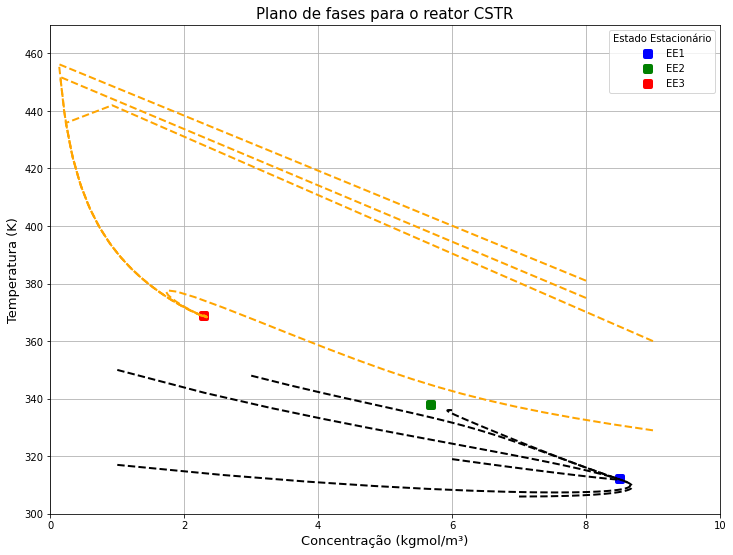

In [5]:
def CSTR_ideal(z,t):
        
    # Variáveis de estado
    # X -> concentração
    # Y -> temperatura
    X,Y = z
      
    # Expressão para o cálculo da constante cinética
    K = K0*np.exp(-EA/(R*Y))
    
    # Balanços de massa e energia 
    dXdt = (1/V) * ( Q*(Cf-X) - V * K * X)
    dYdt = (1/ (V*Cp) ) * ( Q * Cp *(Tf-Y) - deltaH * V * K *X- hA * (Y-Tc))
     
    return dXdt, dYdt

## Soluções estacionárias considerando a resolução da letra (b)
sol1 = EE1[1] 
sol3 = EE3[1]

# Construção do vetor de pontos aleatórios para avaliação do plano de fases 
N = 10
T = np.random.randint(300,400,N)  # Temperatura
C = np.random.randint(1,10,N)     # Concentração

# Matriz contendo os chutes inicias
y = np.array([C,T])
df = pd.DataFrame(y)
df = np.transpose(df)

# Definição do intervalo de tempo
n = 100
tspan = np.linspace(0,20,n)

# Matriz para armazenamento das soluções das EDOs
M = np.zeros((n,N*2))

# Loop computacional contendo a solução das EDOs

for i in df.index:

    y0 = [df.loc[i,0], df.loc[i,1]]
    Y = odeint(CSTR_ideal,y0,tspan)
    
    M[:,2*i] =  Y[:,0]
    M[:,2*i+1] =  Y[:,1]
        
M = pd.DataFrame(M)

## Diagrama contendo os resultados para o plano de fases

plt.figure(figsize=(12,9))

for k in range(N):
    
    if(np.ceil(M.loc[n-1,2*k+1])==np.ceil(sol1)):
        plt.plot(M.loc[:,2*k],M.loc[:,2*k + 1], color = 'black', linewidth = 2, linestyle = '--')
        
    elif(np.ceil(M.loc[n-1,2*k+1])==np.ceil(sol3)):
        plt.plot(M.loc[:,2*k],M.loc[:,2*k+1], color = 'orange', linewidth = 2,linestyle = '--')  
    else:
        plt.plot(M.loc[:,2*k],M.loc[:,2*k+1], color = 'blue', linewidth = 2,linestyle = '--')  
                                                                                

plt.xlim(0,Cf)
plt.ylim(300,470)
plt.scatter(EE1[0],EE1[1], label = 'EE1', marker  = 's', linewidth = 4, color = 'blue')
plt.scatter(EE2[0], EE2[1], label = 'EE2', marker = 's', linewidth = 4, color = 'green')
plt.scatter(EE3[0],EE3[1], label = 'EE3', marker ='s', linewidth = 4, color = 'red')
plt.legend(loc='upper right', title = 'Estado Estacionário')
plt.xlabel('Concentração (kgmol/m³)', fontsize = 13)
plt.ylabel('Temperatura (K)', fontsize = 13)
plt.title('Plano de fases para o reator CSTR', fontsize = 15)
plt.grid()
plt.show()

## Análise do gráfico

O plano de fases destaca os três pontos estacionários calculados nas letras (a) e (b). A geração de pontos aleatórios indica os caminhos das trajetórias dinâmicas até a estabilização em dois pontos estacionários (EE1 e EE3). O ponto intermediário EE2 indica um ponto de equilíbrio instável. 

## Lista 01 - Letra D 

Construção de soluções estacionárias do reator com a temperatura da camisa (Tc) como variável independente. Construa o diagrama  tridimensional contendo as variáveis TEE, Tc e QV. 

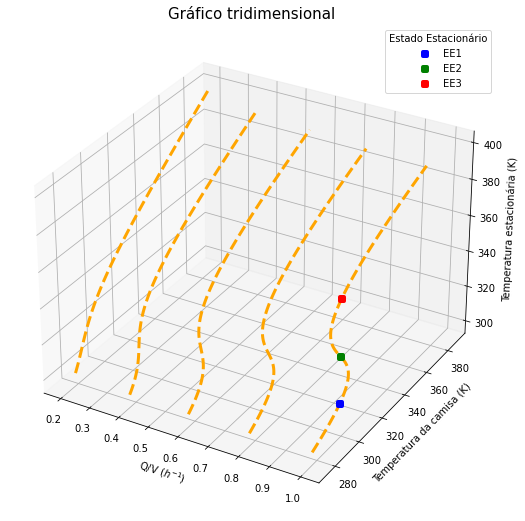

In [6]:
## Construção dos vetores Q/V, Tc e TEE

def Temp_camisa(Tee,Q):        
     
    Cee = Q * Cf / (Q + (V*(K0* np.exp(-EA/(R*Tee)))))
    Tc = Tee + (Q*Cp*(Tee - Tf))/hA + - (-deltaH)*V*(K0* np.exp(-EA/(R*Tee)))*Cee/hA
     
    return Tc

N = 5  
vetor_T = np.arange(T1,T2,1)        # TEE
vetor_Q = np.linspace(0.02, 0.1, N) # Q/V

# Vetor para armazenamento dos valores de TEE e Tc
T = np.ones((len(vetor_T),N*2))
T = pd.DataFrame(T)

# Loop computacional para computar os valores de TEE e Tc

for i,k in enumerate(vetor_Q) :

    T.loc[:,2*i] = T.loc[:,2*i]*k
    
    for j,Tee in enumerate(vetor_T):
        
        Tc = Temp_camisa(Tee,k)
        T.loc[j,2*i+1] = Tc
    
fig2 = plt.figure(figsize = (14,9))
fig2.patch.set_facecolor('white')
axis = plt.axes(projection ='3d')

for i in range(N):    
    
    axis.plot(T.loc[:,2*i]/V,T.loc[:,2*i + 1],vetor_T, linewidth = 3, linestyle = '--', color = 'orange')
   # axis.invert_xaxis()

axis.set_xlabel('Q/V ($h^{-1}$)')
axis.set_title('Gráfico tridimensional', fontsize = 15)
axis.set_ylabel ('Temperatura da camisa (K)')
axis.set_zlabel ('Temperatura estacionária (K)')
axis.set_facecolor('white')
axis.patch.set_facecolor('white')

Q = 0.1           # m³/h
V = 0.1           # m³
Tc = 298.5        # K

axis.scatter(Q/V, Tc, EE1[1], marker  = 's', linewidth = 4, color = 'blue', label = 'EE1')
axis.scatter(Q/V, Tc, EE2[1], marker = 's', linewidth = 4, color = 'green', label = 'EE2')
axis.scatter(Q/V, Tc, EE3[1],marker ='s', linewidth = 4, color = 'red', label = 'EE3')
axis.legend(title = 'Estado Estacionário')
axis.grid()
plt.show()    

## Análise do gráfico

As curvas geradas pelo gráfico tridimensional indicam a faixa de operação em que ocorre a possibilidade de multiplicidade de estados estacionários segundo a variação de duas condições de processos. É possível observar uma curva em formato "S" a partir de faixas superiores à 0.5 para o tempo espacial (Q/V). Realizando-se o gráfico bidimensional entre Tc e TEE para um valor de Q/V acima de 0.5 é possível observar essa relação em formato de "S".   